In [1]:
import numpy as np
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('train.csv')
train = train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train['Sex'] = train['Sex'].map({'male' : 0,'female' : 1})
train['Embarked'] = train['Embarked'].map({'S' : 0,'C' : 1,'Q' : 2})
#查看遺失值個數並填補
print(train.shape[0] - train.count())
train['Age'] = train['Age'].fillna(train['Age'].mean())
train = train.dropna(subset=['Embarked'])
print(train.shape[0] - train.count())
train.tail()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,0,27.000000,0,0,13.00,0.0
887,1,1,1,19.000000,0,0,30.00,0.0
888,0,3,1,29.699118,1,2,23.45,0.0
889,1,1,0,26.000000,0,0,30.00,1.0
890,0,3,0,32.000000,0,0,7.75,2.0


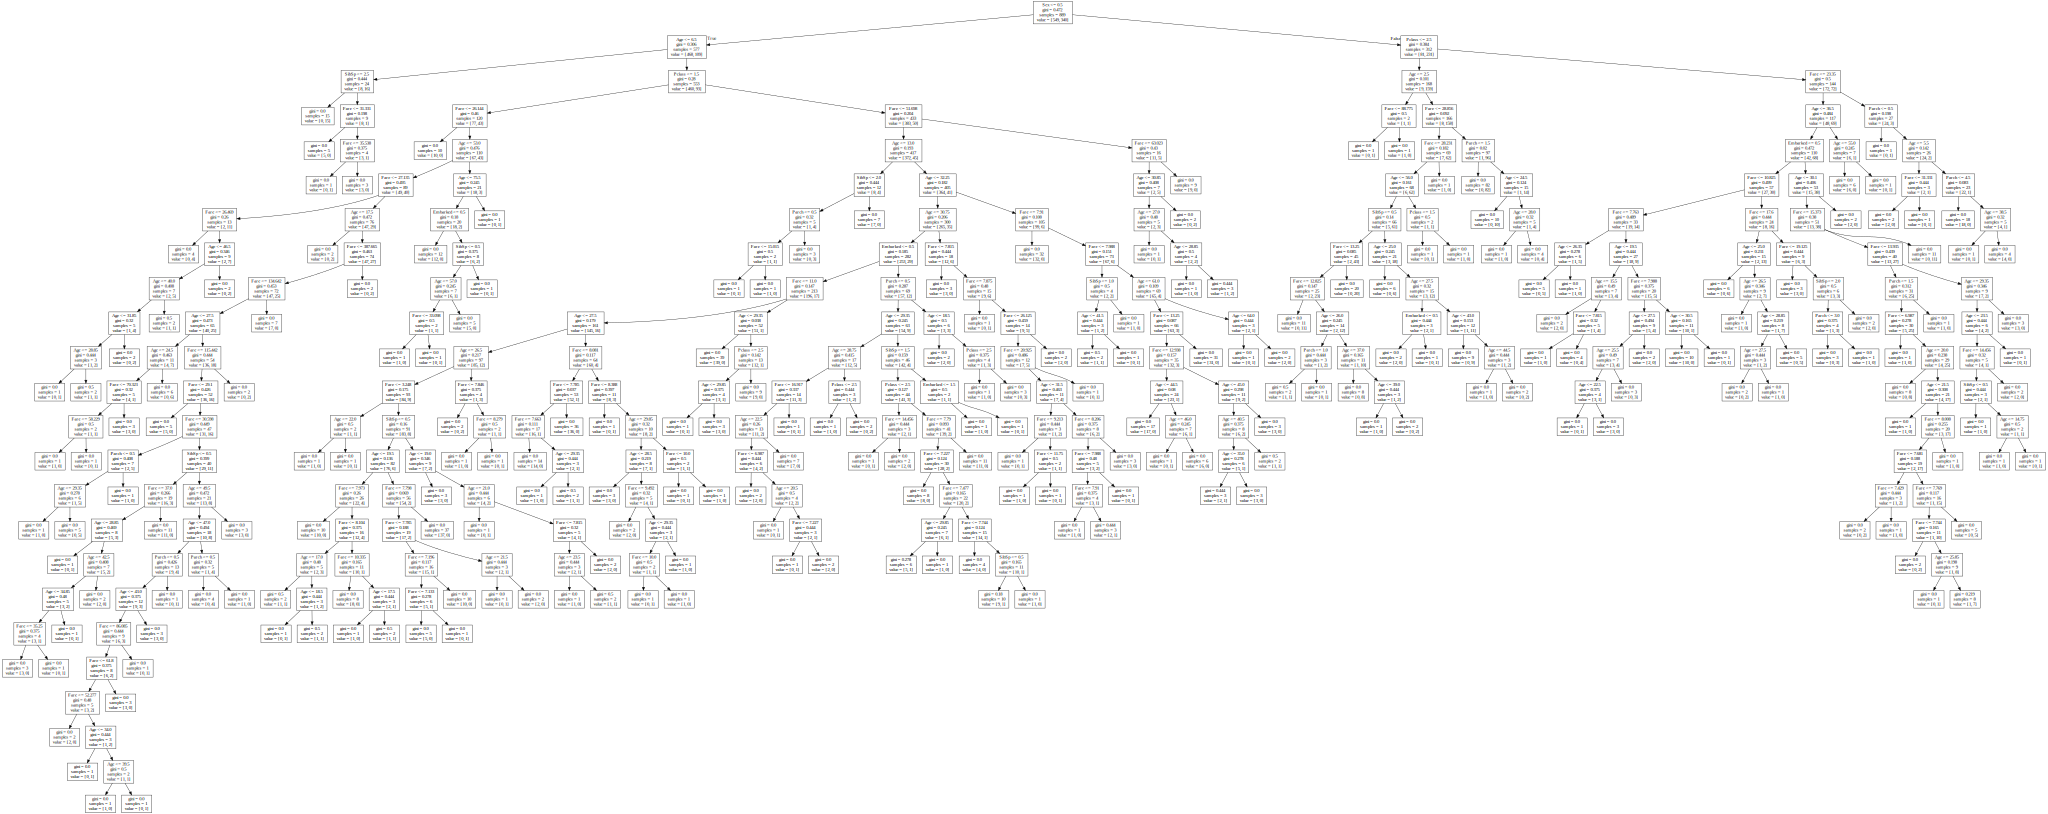

In [3]:
dtree = DecisionTreeClassifier()
X = train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = train['Survived']
dtree.fit(X,y)
y_predict = dtree.predict(X)
accuracy_score(y,y_predict)
#畫圖
a = export_graphviz(dtree,out_file =None,feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
graph = graphviz.Source(a)
graph

In [4]:
test = pd.read_csv('test.csv')
test.head()
test['Sex'] = test['Sex'].map({'male' : 0,'female' : 1})
test['Embarked'] = test['Embarked'].map({'S' : 0,'C' : 1,'Q' : 2})
test = test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
print(test.shape[0] - test.count())
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
print(test.shape[0] - test.count())
test_predict = dtree.predict(test)
print(test_predict)

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
[0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 1 

In [5]:
result = pd.DataFrame({'PassengerId':range(892,1310),
             'Survived': test_predict})
result.to_csv('Result.csv',index = False)
